In [9]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import transformers
import shap_customized.shap as shap
import pickle
np.random.seed(seed=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
with open("/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/beeswarm/v0328_shap_vals_test_uniq_en_None_samp500.pkl", 'rb') as f:
    shap_values = pickle.load(f)

In [12]:
df_ref['Unnamed: 1'].values[1:-2]

array(['ÊzîdîPress Wh', '#ErdogansWarOnAfrin',
       '#EnesKanterLightFoundation', ..., 'Elections', 'liberation',
       'spit'], dtype=object)

In [10]:
df_ref = pd.read_csv("/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/tmp.csv", index_col=0)
df = pd.read_csv(
    "/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/beeswarm/dataset_test_uniq_en_processed.csv", engine="python")


In [27]:
df['id'].fillna(0).astype(int).values[:10]

array([1268560991077502720,  183366574932115456,  337922203217694720,
       1161370581884907520, 1229204829517549568, 1181267744026759168,
       1244668005956501504, 1243493575230230528, 1194219655717642240,
        309394027386646464])

In [28]:
from shapley_value import get_text_samples
text_sample_0, text_sample_1, text_sample_2 = get_text_samples(df, df_ref['Unnamed: 1'].values[1:-2].tolist())

In [31]:
text_sample_0[10]

'https://twitter.com/Unknown/status/843678008506552320'

In [32]:
text_sample_0.insert(0, 'text_sample_0')
text_sample_0.append(None)
text_sample_0.append(None)
df_ref['text_sample_0_url'] = text_sample_0

text_sample_1.insert(0, 'text_sample_1')
text_sample_1.append(None)
text_sample_1.append(None)
df_ref['text_sample_1_url'] = text_sample_1

text_sample_2.insert(0, 'text_sample_2')
text_sample_2.append(None)
text_sample_2.append(None)
df_ref['text_sample_2_url'] = text_sample_2


In [33]:
df_ref.to_csv("/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/tmp.csv")


In [17]:
from shapley_value import build_spreadsheet
spread_df = build_spreadsheet(['None', "TR", 'DE', 'FR', "RU", 'IN'])

In [18]:
spread_df

,feature_name,all_samp_mean_over_all,all_samp_mean_over_nonzero,TR_samp_mean_over_all,TR_samp_mean_over_nonzero,DE_samp_mean_over_all,DE_samp_mean_over_nonzero,FR_samp_mean_over_all,FR_samp_mean_over_nonzero,RU_samp_mean_over_all,RU_samp_mean_over_nonzero,IN_samp_mean_over_all,IN_samp_mean_over_nonzero
0,bring,-0.000013,-0.015450,-0.000016,-0.036013,-1.207425e-06,-0.005851,-4.791061e-06,-0.006034,1.668009e-07,0.000608,-1.389732e-05,-0.011599
1,out,-0.000204,-0.018566,-0.000060,-0.011899,-1.214776e-04,-0.016819,-1.182791e-04,-0.018622,-5.733508e-05,-0.016071,-9.910578e-05,-0.017981
2,the,-0.001877,-0.010436,-0.000578,-0.005758,-7.719557e-04,-0.007713,-4.837762e-04,-0.004678,-1.030076e-03,-0.009625,-7.373798e-04,-0.007361
3,brooms,-0.000002,-0.035268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,If,-0.000072,-0.009875,-0.000013,-0.009916,6.095613e-07,0.000128,3.061705e-07,0.000070,1.435872e-05,0.013081,-1.144127e-05,-0.003183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28265,#15August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.174920e-05,0.174219
28266,cosy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.984880e-06,-0.008283
28267,fieldtested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.709548e-07,-0.002800
28268,#StopArmingIsrael,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.063445e-06,-0.008611


In [19]:
spread_df.to_csv('/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/spreadsheet/union_features_with_ranks.csv')

In [21]:
from shapley_value import build_spreadsheet
spread_df = build_spreadsheet(['None', "TR", 'DE', 'FR', "RU", 'IN'], top=500)


In [22]:
spread_df

,feature_name,all_samp_mean_over_all,all_samp_mean_over_nonzero,TR_samp_mean_over_all,TR_samp_mean_over_nonzero,DE_samp_mean_over_all,DE_samp_mean_over_nonzero,FR_samp_mean_over_all,FR_samp_mean_over_nonzero,RU_samp_mean_over_all,RU_samp_mean_over_nonzero,IN_samp_mean_over_all,IN_samp_mean_over_nonzero
0,,-0.002119,NaN,-0.001155,NaN,-0.001522,NaN,-0.001523,NaN,-0.001545,NaN,-0.001418,NaN
1,Turkish,0.002119,0.29115,0.006133,0.27285,0.000053,0.255561,0.000176,0.29624,NaN,NaN,NaN,NaN
2,and,-0.001938,NaN,-0.001274,NaN,-0.000778,NaN,-0.000596,NaN,-0.000971,NaN,-0.000824,NaN
3,the,-0.001877,NaN,-0.000578,NaN,-0.000772,NaN,-0.000484,NaN,-0.001030,NaN,-0.000737,NaN
4,to,-0.001643,NaN,-0.000830,NaN,-0.000901,NaN,-0.001031,NaN,-0.000821,NaN,-0.000925,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,Burn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.035474
3052,thy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.035433
3053,Elections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.035412
3054,liberation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035400


In [ ]:
spread_df.to_csv(
    '/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/spreadsheet/union_features_with_ranks_top.csv')


In [4]:
shap_values[0]

.values =
array([-9.00256378e-03, -1.02534629e-02, -7.76168134e-03, -1.05464010e-02,
        1.67229341e-03,  1.06141574e-02,  4.30742686e-03, -2.57306932e-02,
        1.26859668e-04,  6.54790225e-02, -1.04707932e-02, -1.01011547e-02,
       -2.42573337e-02, -3.19272927e-03,  3.57708661e-05,  1.50154333e-04,
       -9.64419567e-05, -2.70115323e-02,  5.40072448e-03,  8.59974604e-03,
       -2.96447374e-03, -1.78262807e-03, -8.05282852e-03, -1.23278143e-02,
       -3.37699070e-02, -2.21803897e-02,  1.03385911e-03,  1.32126514e-03,
        1.88785689e-02,  1.20320891e-02,  6.48001080e-04,  1.99497368e-03,
        4.92175263e-03,  3.49085110e-03, -6.59523657e-03, -1.34074192e-02,
       -1.44018015e-02, -5.78779812e-03, -2.91399814e-02,  1.71674974e-03,
       -4.33881138e-03,  6.78304818e-02,  1.10477181e-01,  1.88759661e-01])

.base_values =
0.3468726873397827

.data =
array(['We ', 'are ', 'grateful ', 'to ', 'our ', 'supporter ',
       'sympathiser ', 'and ', 'brother ', 'Pakistan ', 

In [3]:
tmp = shap_values._numpy_func("mean", **{"axis": 0})

In [4]:
tmp

.values =
array([-0.00445895, -0.00578501, -0.00776168, ..., -0.01346799,
        0.00494457, -0.05343606])

.base_values =
0.3468726873397827

.data =
array(['We ', 'are ', 'grateful ', 'to ', 'our ', 'supporter ',
       'sympathiser ', 'and ', 'brother ', 'Pakistan ', 'for ', 'each ',
       'and ', 'every ', 'gesture ', 'of ', 'support ', 'and ', 'for ',
       'standing ', 'by ', 'us ', 'in ', 'our ', 'stuggle ', 'for ',
       'right ', 'of ', 'selfdetermination ', 'since ', 'past ', '7 ',
       'decades ', 'It ', 'will ', 'always ', 'be ', 'remembered ',
       'and ', 'regarded ', 'by ', 'all ', 'Kashmiris ',
       '#KashmirSolidarityDay'], dtype='<U21')

In [11]:
df = pd.read_csv('/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/beeswarm/20230402_word_importance_in_censorship - word_importance.csv', index_col=0)

In [17]:
df["""word_importance for whether_a_tweet_will_be_censored
Positive values = contribution to censorship. Negative values = not censored. -9999999 = placeholder for "division by zero" error"""]


word_index         sort_by
861           0.4301496864
863           0.4131334603
865           0.3920011864
866           0.3876518043
                  ...     
3053              -9999999
3054              -9999999
3055              -9999999
NaN               -9999999
NaN               -9999999
Name: word_importance for whether_a_tweet_will_be_censored\nPositive values = contribution to censorship. Negative values = not censored. -9999999 = placeholder for "division by zero" error, Length: 3059, dtype: object

In [18]:
df.loc[df["""word_importance for whether_a_tweet_will_be_censored
Positive values = contribution to censorship. Negative values = not censored. -9999999 = placeholder for "division by zero" error"""] == 'bring', 'num_occurrence_in_all_samples'] = 10000

In [19]:
df.loc[df["""word_importance for whether_a_tweet_will_be_censored
Positive values = contribution to censorship. Negative values = not censored. -9999999 = placeholder for "division by zero" error"""] == 'bring', 'num_occurrence_in_all_samples']


Series([], Name: num_occurrence_in_all_samples, dtype: int64)

In [28]:
tmp1[2]["brings"]


[-0.08258119417587295,
 -0.025649841089034453,
 -0.011178109650375388,
 -0.007455230428604409]

In [29]:
# df['num_occurrence_in_all_samples'] = [0] * df.shape[0]
for key, val in tmp1[2].items():
    print(key, len(val))
    break
    # df.loc[df["Unnamed: 1"] == key, 'num_occurrence_in_all_samples'] = len(val)


bring 20


In [27]:
df.to_csv("/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/tmp.csv")

In [25]:
df

,Unnamed: 1,"word_importance for whether_a_tweet_will_be_censored\nPositive values = contribution to censorship. Negative values = not censored. -9999999 = placeholder for ""division by zero"" error",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Reasons for censoring it,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,num_occurrence_in_all_samples
word_index,word,sort_by,"all_countries_all_tweets\n(i.e., All countries...","all_countries_tweets_with_this_word\n(i.e., Al...",turkey_all_tweets,turkey_tweets_with_this_word,germany_all_tweets,germany_tweets_with_this_word,france_all_tweets,france_tweets_with_this_word,...,russia_tweets_with_this_word,india_all_tweets,india_tweets_with_this_word,(For Germany) What context does this word usua...,(For Germany) Related law / policy / etc?,(For Turkey) What context does this word usual...,(For Turkey) Big news events / political trend...,(For Russia) What context does this word usua...,(For Russia) Big news events / political trend...,18
861,ÊzîdîPress Wh,0.4301496864,NaN,NaN,0.0001877153334,0.8601116574,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,kurds repression,- news control about turkish border and war wi...,NaN,NaN,0
863,#ErdogansWarOnAfrin,0.4131334603,NaN,NaN,0.000180289531,0.826086631,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,HR on Afrin,- repression about the news of HR violation fr...,NaN,NaN,0
865,#EnesKanterLightFoundation,0.3920011864,NaN,NaN,0.0001710675044,0.7838313053,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
866,YPJKurds,0.3876518043,NaN,NaN,0.0001691694542,0.7751344391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Elections,-9999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.03541161236,NaN,NaN,NaN,NaN,NaN,NaN,2
3054,liberation,-9999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.03540033323,NaN,NaN,NaN,NaN,NaN,NaN,1
3055,spit,-9999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.03535597773,NaN,NaN,NaN,NaN,NaN,NaN,2
NaN,NaN,-9999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
from scipy import stats
tmp1[1].max(), tmp1[1].min(), stats.describe(tmp1[1])

(0.9566432817082386,
 -0.1892507228476461,
 DescribeResult(nobs=4173, minmax=(-0.1892507228476461, 0.9566432817082386), mean=0.0011679648760921364, variance=0.0044844124929123205, skewness=8.781158545204107, kurtosis=97.3330687069478))

In [7]:
tmp2 = shap_values._numpy_func("mean", **{"axis": 0, "mean_over_all": True})

In [8]:
tmp2

(array(['We', 'are', 'grateful', ..., '#MilitaryEmbargo', 'interview',
        'concerning'], dtype='<U45'),
 array([-2.88501579e-05, -1.09517246e-04, -1.85997636e-06, ...,
        -3.22741139e-06,  1.18489635e-06, -1.28051912e-05]))

In [12]:
from scipy import stats
tmp2[1].max(), tmp2[1].min(), stats.describe(tmp2[1])

(0.01592357904152482,
 -0.00141844117419761,
 DescribeResult(nobs=4173, minmax=(-0.00141844117419761, 0.01592357904152482), mean=1.6783623445786676e-06, variance=6.52945670126861e-08, skewness=58.14037930472575, kurtosis=3613.017214506527))

In [7]:
tmp.feature_names.shape[0]

4173

In [9]:
shap_values.mean(0).values

array([-0.00445895, -0.00578501, -0.00776168, ..., -0.01346799,
        0.00494457, -0.05343606])

values: [[-0.00445895 -0.00578501 -0.00776168 ... -0.01346799  0.00494457
  -0.05343606]]
feature_order: [2419 1780 1435 ...  216 2180  141]
feature_names_new: ['We', 'are', 'grateful', 'to', 'our', 'supporter', 'sympathiser', 'and', 'brother', 'Pakistan', 'for', 'each', 'every', 'gesture', 'of', 'support', 'standing', 'by', 'us', 'in', 'stuggle', 'right', 'selfdetermination', 'since', 'past', '7', 'decades', 'It', 'will', 'always', 'be', 'remembered', 'regarded', 'all', 'Kashmiris', '#KashmirSolidarityDay', 'From', 'Israel', 'thy', 'get', 'funds', '', 'Thats', 'why', 'never', 'spoke', 'against', '#PTMDeceivingPashtuns', '#BanPTM', 'I', 'dont', 'think', 'Ive', 'seen', 'enough', 'condemnation', 'Indias', 'communication', 'blockade', '#Kashmir', 'Its', 'cruel', 'illegal', 'immoral', 'reprehensible', 'No', 'other', 'country', 'has', 'deprived', 'an', 'entire', 'people', 'their', 'fundamental', 'speak', 'with', 'loved', 'ones', 'condemn', 'it', 'Will', 'you', 'join', 'me', 'wished', 'that'

Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
Matplotlib currently does not support Devanagari natively.
Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.


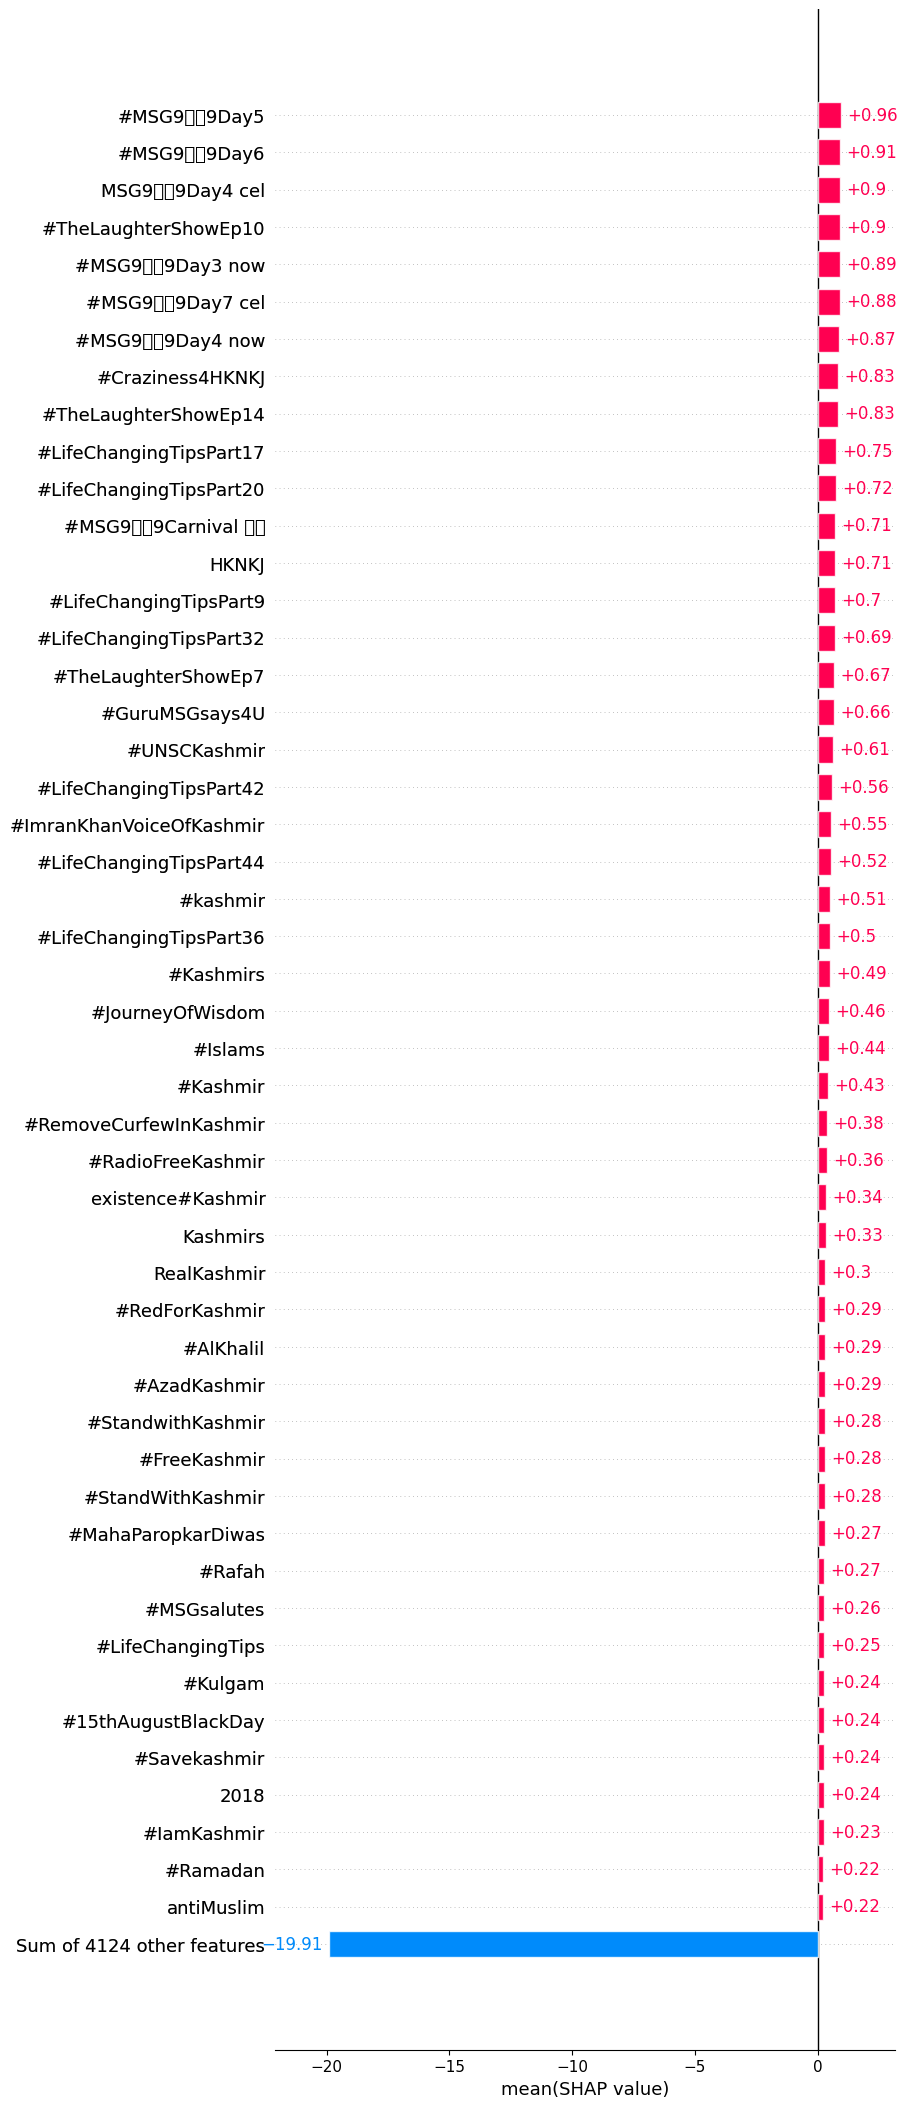

(array([[-0.00445895, -0.00578501, -0.00776168, ..., -0.01346799,
          0.00494457, -0.05343606]]),
 ['We',
  'are',
  'grateful',
  'to',
  'our',
  'supporter',
  'sympathiser',
  'and',
  'brother',
  'Pakistan',
  'for',
  'each',
  'every',
  'gesture',
  'of',
  'support',
  'standing',
  'by',
  'us',
  'in',
  'stuggle',
  'right',
  'selfdetermination',
  'since',
  'past',
  '7',
  'decades',
  'It',
  'will',
  'always',
  'be',
  'remembered',
  'regarded',
  'all',
  'Kashmiris',
  '#KashmirSolidarityDay',
  'From',
  'Israel',
  'thy',
  'get',
  'funds',
  '',
  'Thats',
  'why',
  'never',
  'spoke',
  'against',
  '#PTMDeceivingPashtuns',
  '#BanPTM',
  'I',
  'dont',
  'think',
  'Ive',
  'seen',
  'enough',
  'condemnation',
  'Indias',
  'communication',
  'blockade',
  '#Kashmir',
  'Its',
  'cruel',
  'illegal',
  'immoral',
  'reprehensible',
  'No',
  'other',
  'country',
  'has',
  'deprived',
  'an',
  'entire',
  'people',
  'their',
  'fundamental',
  '

In [3]:
shap.plots.bar(shap_values.mean(0), max_display=50)


# generate shap_values

In [2]:
data = pd.read_csv('/nfs/turbo/coe-vvh/ljr/Censorship/data/v_0305/dataset_test_uniq_en.csv', engine='python', index_col=0)
data['full_text_wo_label'] = data['full_text_wo_label'].str.replace(r'[^\w\s#]', '', regex=True).str.strip()
data = data.loc[data['full_text_wo_label'].str.contains(' ')]


In [3]:
data.to_csv("/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/beeswarm/dataset_test_uniq_en_processed.csv")


In [3]:
from tqdm import tqdm
# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, pad_to_max_length=True, max_length=500) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    # val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    # modify val
    val = scores[:, 1]
    return val

tokenizer = transformers.AutoTokenizer.from_pretrained("roberta-base")
model = transformers.AutoModelForSequenceClassification.from_pretrained("roberta-base").cuda()

model.load_state_dict(torch.load(
    '/nfs/turbo/coe-vvh/ljr/Censorship/models/20230311-10:45:13_binary_0.1_8_1e-05_adamw.pt'))

explainer = shap.Explainer(f, shap.maskers.Text())

# data = data[data['full_text_wo_label'].str.contains(' ')]


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [ ]:
explainer = shap.Explainer(f, shap.maskers.Text())

In [4]:
withheld_list = [None] # 'TR', 'RU', 
# withheld_list = ['TR', 'RU', 'DE', 'FR', 'IN']
# withheld_list = ['DE']
# withheld_list = [None]
# sample 500

In [ ]:

for withheld in tqdm(withheld_list):
    flag = 1        
    new_data = 0
    if withheld is not None:
        new_data = data[data['withheld'].fillna('').str.contains(f"'{withheld}")]
    else:
        new_data = data
    new_data.to_csv(f'/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/beeswarm/v_0328_dataset_test_uniq_en_{str(withheld)}.csv')
    if withheld is not None:
        if withheld == 'RU':
            new_data = new_data.sample(n=400, replace=False, random_state=1)
        elif withheld == 'DE':
            new_data = new_data.sample(n=500, replace=False, random_state=1)
        elif withheld == 'IN':
            new_data = new_data
        else:
            new_data = new_data.sample(n=500, replace=False, random_state=1) # for test
    else:
        new_data = new_data.sample(n=5000, replace=False, random_state=1)

    shap_values_bert = explainer(new_data['full_text_wo_label'].values.tolist())

    with open(f'/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/beeswarm/v0328_shap_vals_test_uniq_en_{str(withheld)}_samp500.pkl', 'wb') as f:
        pickle.dump(shap_values_bert, f)
    shap.plots.bar(shap_values_bert.mean(0), max_display=50)
    
            
#     shap.plots.beeswarm(shap_values)


  0%|          | 0/1 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or us

['"Dear', 'jihad', 'anti-White', '"Berkeley', 'Sharia,', 'ISIS', '"BENGHAZI', 'ISIS....', '"These', 'Islam.', '"We', '"A', '"Martin', 'German', '"YPG', 'Whites', 'Germany', '"Two', 'race', '"But', 'Sharia-adherent', 'anti-Whiteness.', '#EndFGM', '"Breaking:', 'Hitler', '#fattuesday"', 'CAIR,', '#Würselen!', 'Turkish', '#ReligiousFreedom', 'White', '"It', 'warned!', '"Refugee"', 'Alexandr', 'Jihad', 'Islam:', '#Europe', 'Islamic', 'Najka,Iskan,Hajj', 'there...because', '#nationalism', 'Islam', '"refugees"...', 'UK.', 'Islam?”', 'Reagan', 'Waffen', 'people', 'confused"', '#HolocaustMemorialDay', 'Ramadan', 'Germany:', 'Muslim', 'ISLAM', 'society"', 'Refuse', '#Tucker', 'peoples', '"It\'s', 'Has', 'more:', "'How", 'loser', '"So,', 'people,', '"This', '"Some', 'order."', '"The', 'RISE', 'monitor', 'Leftists...', 'about:', 'social', 'up."', 'virtue-signalling."', 'EUROPA', '"blasphemous"', 'YouTube', 'girls', 'nder', 'kitten', '!', 'girls.', 'Involved!"', '""', 'Ronald', 'takes', 'free', 'C

Glyph 128073 missing from current font.
Glyph 127995 missing from current font.
Glyph 128073 missing from current font.
Glyph 127995 missing from current font.


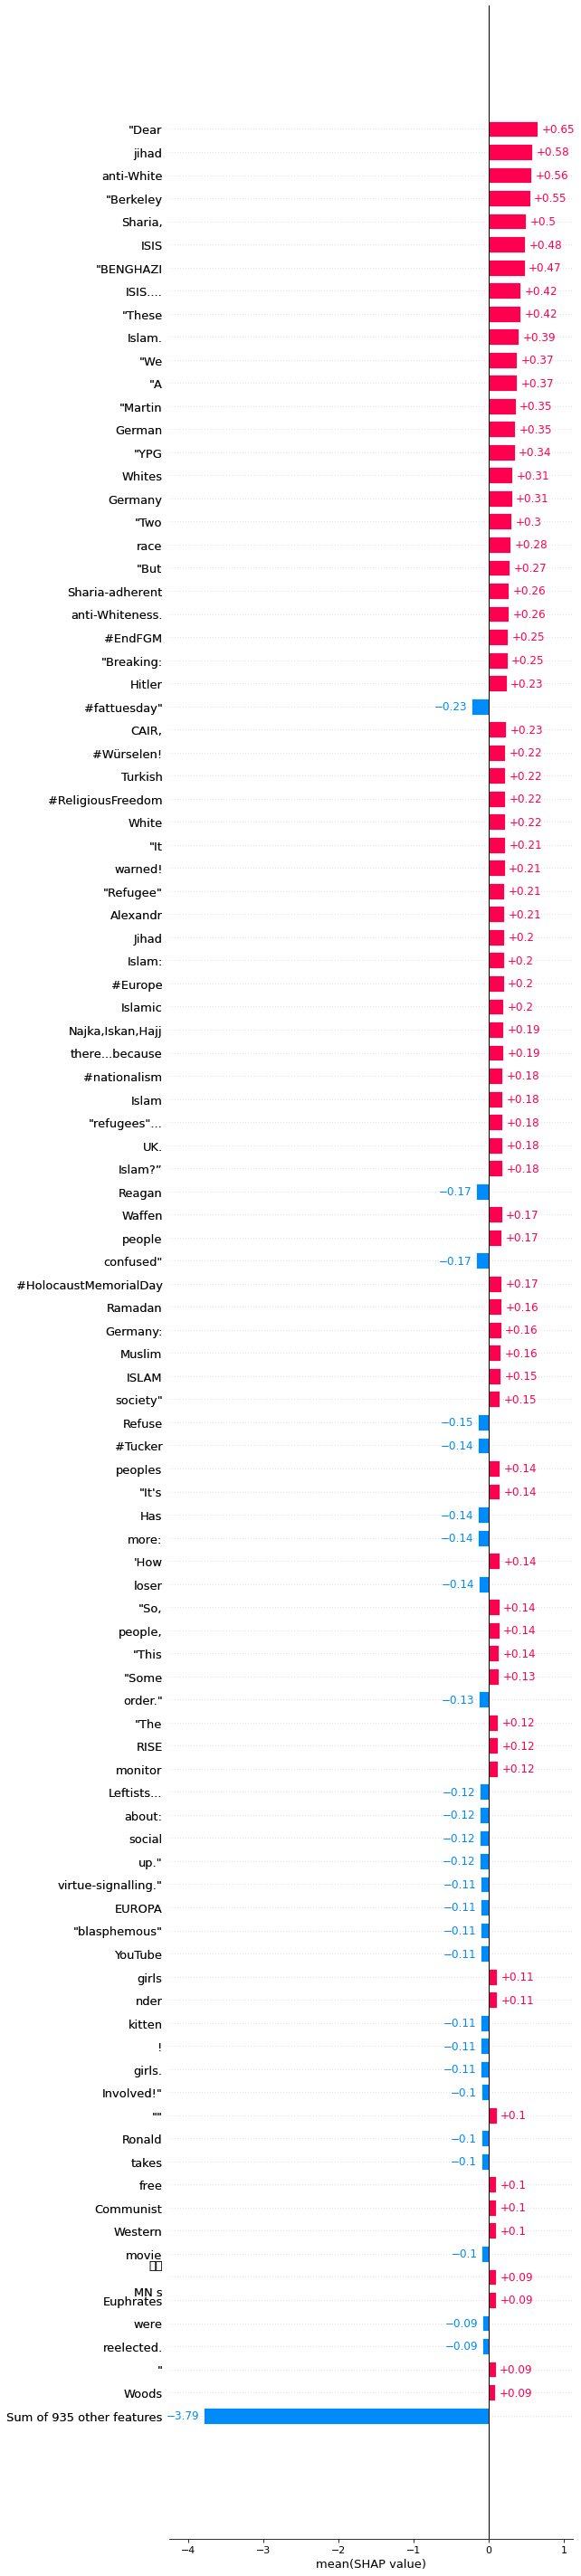

In [ ]:
shap.plots.bar(shap_values_bert.mean(0), max_display=100)

# beeswarm xgboost test

In [26]:
import xgboost
import shap

# train XGBoost model
X1,y1 = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X1, y1)

# compute SHAP values
explainer1 = shap.Explainer(model, X1)
shap_values1 = explainer1(X1)

2023-03-28 00:49:53.762122: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 00:49:54.256812: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-28 00:50:00.804958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ljrjerry/anaconda3/envs/env38/lib/python3.8/site-packages/cv2/../../lib64:/opt/slurm/lib64:
2023-03-28 00:50:00.805417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load

In [27]:
X1,y1

(        Age  Workclass  Education-Num  Marital Status  Occupation  \
 0      39.0          7           13.0               4           1   
 1      50.0          6           13.0               2           4   
 2      38.0          4            9.0               0           6   
 3      53.0          4            7.0               2           6   
 4      28.0          4           13.0               2          10   
 ...     ...        ...            ...             ...         ...   
 32556  27.0          4           12.0               2          13   
 32557  40.0          4            9.0               2           7   
 32558  58.0          4            9.0               6           1   
 32559  22.0          4            9.0               4           1   
 32560  52.0          5            9.0               2           4   
 
        Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
 0                 0     4    1        2174.0           0.0            40.0   


In [28]:
shap_values1[0]

.values =
array([ 0.62066666, -0.4340129 ,  0.40111691, -0.41627076, -0.11005208,
       -0.46145511,  0.03216866,  0.33387261, -2.97870277, -0.11033077,
       -0.09677085,  0.01754525])

.base_values =
-2.6846917531982397

.data =
array([3.900e+01, 7.000e+00, 1.300e+01, 4.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 1.000e+00, 2.174e+03, 0.000e+00, 4.000e+01, 3.900e+01])

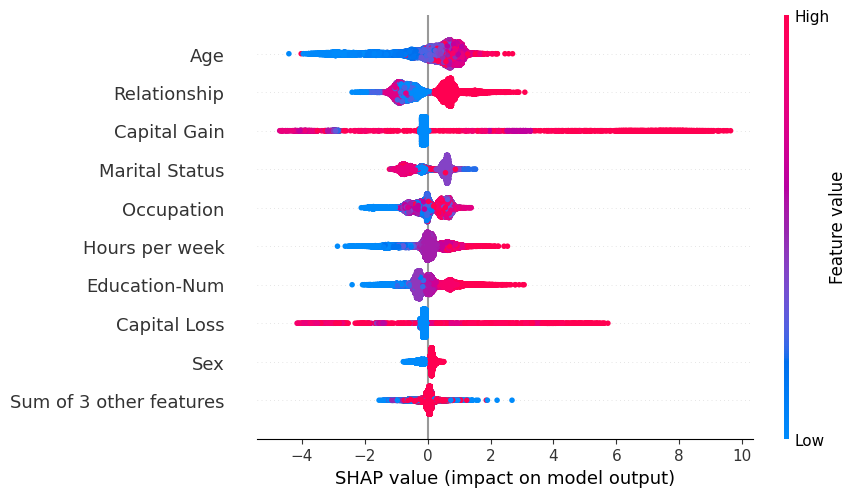

In [31]:
shap.plots.beeswarm(shap_values1)


In [21]:
y1

array([False, False, False, ..., False, False,  True])

In [30]:
shap_values1.data

array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9., ...,  0., 40., 39.],
       ...,
       [58.,  4.,  9., ...,  0., 40., 39.],
       [22.,  4.,  9., ...,  0., 20., 39.],
       [52.,  5.,  9., ...,  0., 40., 39.]])

In [31]:
shap_values1.feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

In [28]:
X1

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


# bar plot

https://drive.google.com/drive/folders/1NLhaS9aDJIrTTNi2AViqUqvCgyEkIMYZ?usp=share_link

['#SDFfreedRaqqa', '#MSG9बर9Day7 cel', '#Craziness4HKNKJ', 'İpek', 'Gulenists', 'CH3L5EA', '#khilafah_education', '#EnesKanterFoundation', '#MSG9बर9Carnival मल', '#LifeChangingTipsPart9', 'YUNANİSTANDA', 'PYDYPG', '#Basij', '#BreakSilenceOnAfrin', '#ThunderUp', 'Khilafah', 'Daeshs', '#PrayForKnicks', '#UNSCKashmir', '#KhilafahIn', 'nonWhites', 'KhilafateRashidah', 'ProErdogan', 'Turkiye', '#Poker', 'Gulenist', 'bookmakers', '#CPAC2017', 'Hizbullah', '#Erdogans', '#TurkeyBombingKurds', 'Yuksekdag', '888poker', 'QHs1Jq13jV6', '#ThunderNation', 'Betül', '#kashmir', '#Khilafah_Education', 'Manbij', 'TurkeyRemember', 'Basij', 'ProJihadi', '#SejakMasukMRSM', 'YPGYPJSDF', 'Şehîd n', '#NoFlyZone4Rojava', 'Erdoğans', '#Kashmirs', '#888Live', 'Sum of 23177 other features']


Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
Matplotlib currently does not support Devanagari natively.
Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.


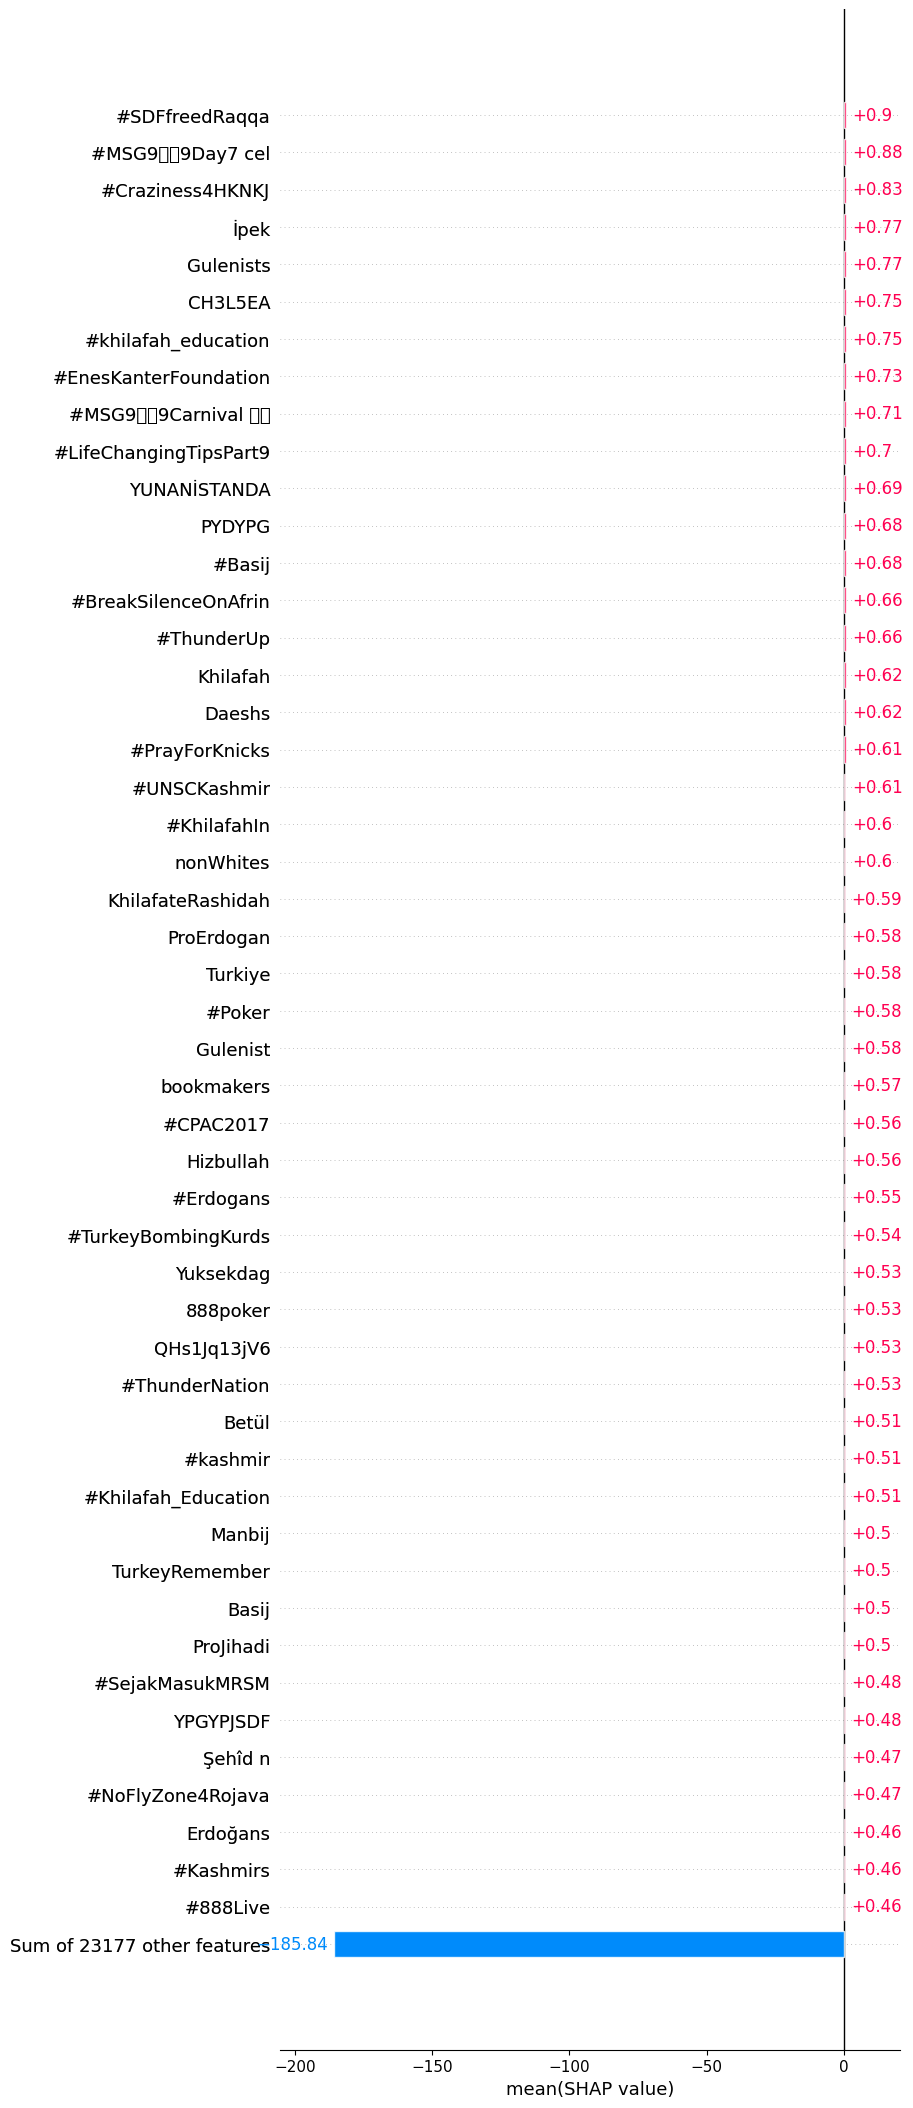

In [3]:
values, features, order = shap.plots.bar(shap_values.mean(0), max_display=50)
# shap.plots.beeswarm(shap_values)
values_sort, features_sort = [], []
for idx, val in enumerate(order):
    values_sort.append(values[0][val])
    features_sort.append(features[val])
# csv_df = pd.DataFrame()
# csv_df['Word'] = features_sort
# csv_df['Value'] = values_sort
# csv_df.to_csv("/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/spreadsheet/IN_samp500_sorted.csv")

# beeswarm

In [4]:
import shapley_value as sv
X, feature_names = sv.convert_shap_values(shap_values, sorted_feature_names_list=features_sort)
new_shap_values = sv.build_new_shap_values(X, feature_names, shap._explanation.Explanation)


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


: 

: 

In [ ]:
with open("/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/beeswarm/v0328_shap_vals_test_uniq_en_None_samp500_sorted.pkl", 'wb') as f:
    pickle.dump(new_shap_values, f)


feature order:  [   0    1    2 ... 5280 5281 5282]


Glyph 2348 (\N{DEVANAGARI LETTER BA}) missing from current font.
Matplotlib currently does not support Devanagari natively.
Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.


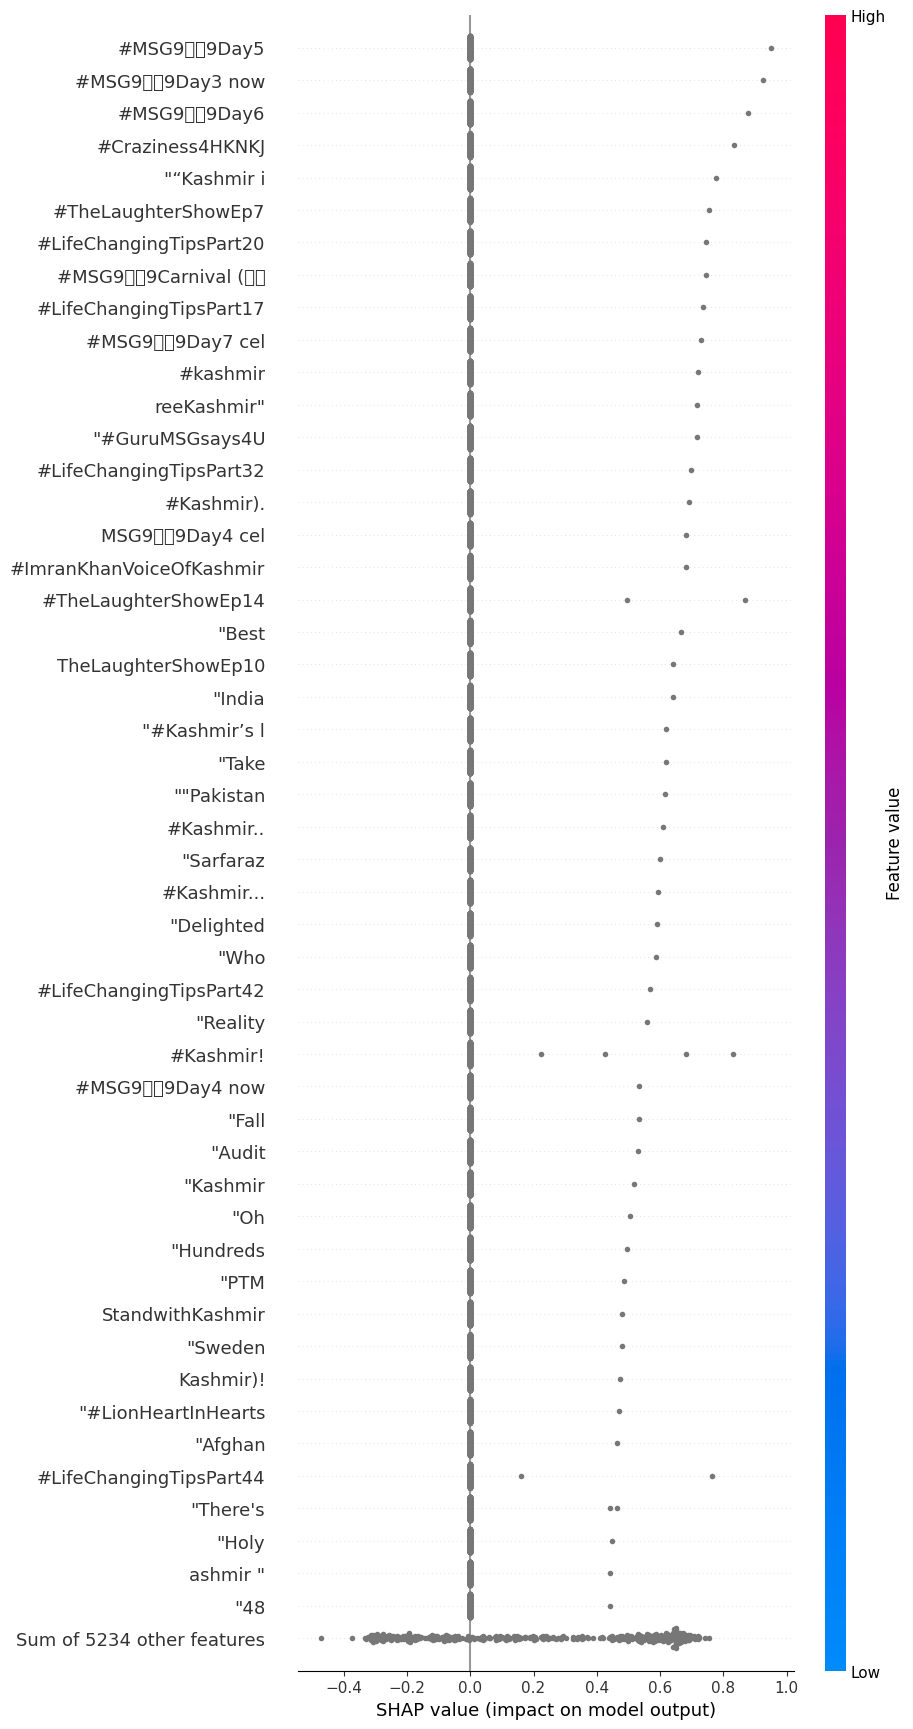

In [ ]:
shap.plots.beeswarm(shap_values=new_shap_values, max_display=50, order=np.arange(new_shap_values[0].values.shape[0]), follow_bar_plot_order=True)


# Something else

In [31]:
data['full_text_wo_label'] = data['full_text_wo_label'].apply(lambda x: x.strip() if type(x) != float else "")
data['full_text_wo_label']
data.to_csv('/nfs/turbo/coe-vvh/ljr/Censorship/data/v_0305/dataset_test_uniq.csv')

468359    Jesus said, “Come to me, all who labor and are...
190098    : "Fethullah Gülen Hocaefendi'nin Çağlayan der...
280600    Gracias a Dios llegan las primeras vacunas al ...
148658                         İsrail Gazze’yi Bombalıyor -
30911     : "Фейсбук: число напавших повстанцев на росси...
                                ...                        
73340     Hakimlerden önce küçük tetikçi Cem, Cumhuriyet...
87647     Allah bunların akıllarını almış. Ensar vakfı z...
425336    Avui al parlament de Ñ cabreix monumental per ...
269772    Charred bodies and besieged families.. Scenes ...
11892     Ahlaksizlik pirim yapinca,namus bu kadar hakar...
Name: full_text_wo_label, Length: 45236, dtype: object

In [38]:
# use_cuda = False
# if use_cuda:
# load a BERT sentiment analysis model
tokenizer = transformers.AutoTokenizer.from_pretrained("roberta-base")
model = transformers.AutoModelForSequenceClassification.from_pretrained("roberta-base").cuda()

model.load_state_dict(torch.load(
    '/nfs/turbo/coe-vvh/ljr/Censorship/models/20230219-03:24:33_binary_0.1_8_1e-05_adamw.pt'))

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, pad_to_max_length=True, max_length=500) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

# build an explainer using a token masker
# explainer = shap.Explainer(f, tokenizer)

In [33]:
# else:
# load a BERT sentiment analysis model
tokenizer = transformers.AutoTokenizer.from_pretrained("roberta-base")
model = transformers.AutoModelForSequenceClassification.from_pretrained("roberta-base")

model.load_state_dict(torch.load(
    '/nfs/turbo/coe-vvh/ljr/Censorship/models/20230311-10:45:13_binary_0.1_8_1e-05_adamw.pt', map_location=torch.device("cpu")))


# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, pad_to_max_length=True, max_length=500) for v in x])
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    # val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    # modify val
    val = scores[:, 1]
    return val

# build an explainer using a token masker
# explainer = shap.Explainer(f, tokenizer)
# explainer = shap.Explainer(f, shap.maskers.Text(r"\s"))

# explain the model's predictions on IMDB reviews
# shap_values = explainer(tmp_df['full_text_proc'].values.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

# Explainer

In [22]:
# explainer = shap.Explainer(f, shap.maskers.Text())
shap_values = explainer(["'NS is Nature:\n\nWe are the manifestation of Nature. We are something that Nature is doing. National Socialism is consciousness of this fact.\n\nNature is timeless, eternal. National Socialism is merely the most recent manifestation of a movement based on Nature-consciousness.'"])
shap.plots.text(shap_values)

AttributeError: 'SimpleTokenizer' object has no attribute 'encode'

In [23]:
explainer = shap.Explainer(f, shap.maskers.Text())
shap_values = explainer(["Jesus said, “Come to me, all who labor and are heavy laden, and I will give you rest. Take my yoke upon you, and learn from me, for I am gentle and lowly in heart, and you will find rest for your souls. For my yoke is easy, and my burden is light.” (Matthew 11:28-30)"])
shap.plots.text(shap_values)

AttributeError: 'SimpleTokenizer' object has no attribute 'encode'

In [8]:
shap_values = explainer(["""[ESPN] Florida-Louisville: 5 things to watch: 
GAINESVILLE, Fla. -- Here are five things to watch fo...  #Louisville"""])
shap.plots.text(shap_values)


In [19]:
shap_values = explainer([": [Did you know?] Hidayet Karaca, Journo &amp; Executive of a Turkish TV network, been in prison since Dec of 2014 in #Tur "])
shap.plots.text(shap_values)



[':', '[Did', 'you', 'know?]', 'Hidayet', 'Karaca,', 'Journo', '&amp;', 'Executive', 'of', 'a', 'Turkish', 'TV', 'network,', 'been', 'in', 'prison', 'since', 'Dec', 'of', '2014', 'in', '#Tur', '']
[': ', '[Did ', 'you ', 'know?] ', 'Hidayet ', 'Karaca, ', 'Journo ', '&amp; ', 'Executive ', 'of ', 'a ', 'Turkish ', 'TV ', 'network, ', 'been ', 'in ', 'prison ', 'since ', 'Dec ', 'of ', '2014 ', 'in ', '#Tur ', '']
[': ', '[Did ', 'you ', 'know?] ', 'Hidayet ', 'Karaca, ', 'Journo ', '&amp; ', 'Executive ', 'of ', 'a ', 'Turkish ', 'TV ', 'network, ', 'been ', 'in ', 'prison ', 'since ', 'Dec ', 'of ', '2014 ', 'in ', '#Tur ', '']


The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
Partition explainer: 2it [00:54, 54.29s/it]               

[':', '[Did', 'you', 'know?]', 'Hidayet', 'Karaca,', 'Journo', '&amp;', 'Executive', 'of', 'a', 'Turkish', 'TV', 'network,', 'been', 'in', 'prison', 'since', 'Dec', 'of', '2014', 'in', '#Tur', '']
[': ', '[Did ', 'you ', 'know?] ', 'Hidayet ', 'Karaca, ', 'Journo ', '&amp; ', 'Executive ', 'of ', 'a ', 'Turkish ', 'TV ', 'network, ', 'been ', 'in ', 'prison ', 'since ', 'Dec ', 'of ', '2014 ', 'in ', '#Tur ', '']
[': ', '[Did ', 'you ', 'know?] ', 'Hidayet ', 'Karaca, ', 'Journo ', '&amp; ', 'Executive ', 'of ', 'a ', 'Turkish ', 'TV ', 'network, ', 'been ', 'in ', 'prison ', 'since ', 'Dec ', 'of ', '2014 ', 'in ', '#Tur ', '']


In [18]:
start = 0
offset_ranges = []
input_ids = []
for word_i, word in enumerate([':', '[Did', 'you', 'know?]', 'Hidayet', 'Karaca,', 'Journo ', '&amp;', 'Executive', 'of', 'a', 'Turkish', 'TV', 'network,', 'been ', 'in', 'prison ', 'since', 'Dec', 'of', '2014 ', 'in', '#Tur', '']):
    end = start + len(word)
    offset_ranges.append((start, end))
    input_ids.append(": [Did you know?] Hidayet Karaca, Journo &amp; Executive of a Turkish TV network, been in prison since Dec of 2014 in #Tur "[start:end])
    start = end
input_ids

[':',
 ' [Di',
 'd y',
 'ou kno',
 'w?] Hid',
 'ayet Ka',
 'raca, J',
 'ourno',
 ' &amp; Ex',
 'ec',
 'u',
 'tive of',
 ' a',
 ' Turkish',
 ' TV n',
 'et',
 'work, b',
 'een i',
 'n p',
 'ri',
 'son s',
 'in',
 'ce D',
 '']

# Explainer testing

In [ ]:
explainer = shap.Explainer(f, shap.maskers.Text())
shap_values = explainer(["#OccupyOakland: footage shows police", "Just voted Ken."])
shap.plots.text(shap_values)

In [ ]:
shap_values = explainer(["..."])
shap.plots.text(shap_values)

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
x = ['...']
tv = torch.tensor([tokenizer.encode(v, pad_to_max_length=True, max_length=500) for v in x])
outputs = model(tv)[0].detach().cpu().numpy()
scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
# val = sp.special.logit(scores[:,1]) # use one vs rest logit units
# modify val
val = scores[:, 1]

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).


In [ ]:
outputs, scores, val

(array([[ 0.29908544, -0.33372974]], dtype=float32),
 array([[0.6531275 , 0.34687245]], dtype=float32),
 array([0.34687245], dtype=float32))

In [ ]:
shap_values = explainer(data['text_proc'].values[:5].tolist())
shap.plots.text(shap_values)

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
Partition explainer: 6it [04:17, 51.58s/it]                       


: 

In [ ]:
class SimpleTokenizer():  # pylint: disable=too-few-public-methods
    """ A basic model agnostic tokenizer.
    """

    def __init__(self, split_pattern=r"\W+"):
        """ Create a tokenizer based on a simple splitting pattern.
        """
        # self.split_pattern = re.compile(split_pattern)

        # Load the pre-trained BERT tokenizer for multilingual language processing
        import transformers
        self.model_name = "roberta-base"
        # self.model_name = 'bert-base-multilingual-cased'
        self.tokenizer = transformers.AutoTokenizer.from_pretrained(self.model_name)

    def word_tokenize(self, text):
        text = re.sub("\n", ' ', text.strip())
        # text = re.sub(r'[^\w\s]', '', text)
        tokenizer = self.tokenizer
        token_ids = tokenizer.encode(text)
        tokens = tokenizer.convert_ids_to_tokens(token_ids)
        # print(tokens)

        # example tokens: ['[CLS]', 'This', 'is', 'an', 'example', 'sentence', ',', 'about', "'", 'how', "'", '(',
        # 'this', 'is', ')', 'to', 'demonstrate', 'how', 'to', 'use', 'the', 'BE', '##RT', 'tok', '##eni', '##zer',
        # '.', '[SEP]']
        if self.model_name == 'bert-base-multilingual-cased':
            tokens = tokens[1:-1]  # remove '[CLS]', '[SEP]'
            words = []
            subword_prefix = '##'
            for i, token in enumerate(tokens):
                if token.startswith(subword_prefix):
                    words[-1] += token[2:]
                else:
                    words.append(token)

            # print(words)
            words_with_space = self.add_back_space(text, words)
            # print(words_with_space)
            return words_with_space
        elif self.model_name == 'roberta-base':
            tokens = tokens[1:-1]
            words = []
            subword_prefix = ['Ġ', 'Ċ']
            for i, token in enumerate(tokens):
                # print('this token:', token)
                if token.startswith(subword_prefix[0]):
                    words.append(token[1:])
                elif token.startswith(subword_prefix[1]):
                    words.append('')
                    # continue
                else:
                    if len(words) == 0:
                        words.append(token)
                    else:
                        words[-1] += token
            # print("words:", words)
            words_with_space = self.add_back_space(text, words)
            return words_with_space

    def add_back_space(self, text, words):
        char_i = 0
        for token_i, token in enumerate(words):
            char_i = char_i + len(token)
            if char_i < len(text):
                if text[char_i] == ' ':
                    words[token_i] += ' '
                    char_i += 1
        return words

    def __call__(self, s, return_offsets_mapping=True):
        """ Tokenize the passed string, optionally returning the offsets of each token in the original string.
        """
        # pos = 0
        # offset_ranges = []
        # input_ids = []
        # for m in re.finditer(self.split_pattern, s):
        #     start, end = m.span(0)
        #     offset_ranges.append((pos, start))
        #     input_ids.append(s[pos:start])
        #     pos = end
        # if pos != len(s):
        #     offset_ranges.append((pos, len(s)))
        #     input_ids.append(s[pos:])

        # out = {}
        # out["input_ids"] = input_ids
        # if return_offsets_mapping:
        #     out["offset_mapping"] = offset_ranges
        # return out

        words = self.word_tokenize(s)
        start = 0
        offset_ranges = []
        input_ids = []
        for word_i, word in enumerate(words):
            end = start + len(word)
            offset_ranges.append((start, end))
            input_ids.append(s[start:end])
            start = end

        out = {}
        out["input_ids"] = input_ids
        # print(input_ids)
        if return_offsets_mapping:
            out["offset_mapping"] = offset_ranges
        # import pdb;pdb.set_trace()
        return out


In [ ]:
tokenizer = SimpleTokenizer()
import re
# Define an example text sequence
text = ' NS is Nature:\n\nWe are the manifestation of Nature. We are something that Nature is doing. National Socialism is consciousness of this fact.\n\nNature is timeless, eternal. National Socialism is merely the most recent manifestation of a movement based on Nature-consciousness.'
tokens = tokenizer.word_tokenize(text)
print("tokens:", tokens)


tokens: ['NS ', 'is ', 'Nature: ', ' ', 'We ', 'are ', 'the ', 'manifestation ', 'of ', 'Nature. ', 'We ', 'are ', 'something ', 'that ', 'Nature ', 'is ', 'doing. ', 'National ', 'Socialism ', 'is ', 'consciousness ', 'of ', 'this ', 'fact. ', ' ', 'Nature ', 'is ', 'timeless, ', 'eternal. ', 'National ', 'Socialism ', 'is ', 'merely ', 'the ', 'most ', 'recent ', 'manifestation ', 'of ', 'a ', 'movement ', 'based ', 'on ', 'Nature-consciousness.']


In [ ]:
new_tokens = []
for token in tokens:
    new_token = re.sub(r'[^\w\s#]', '', token)
    new_tokens.append(new_token)
new_tokens

['This ',
 'is ',
 'an ',
 'example ',
 'sentence ',
 '#hashtag ',
 'about ',
 'how ',
 'this ',
 'is ',
 'to ',
 'demonstrate ',
 'how ',
 'to ',
 'use ',
 'the ',
 'BERT ',
 'tokenizer']

In [ ]:
tokenizer = SimpleTokenizer()

# Define an example text sequence
text = 'languages.\n\n#GenderEqualityUnmasked\n#سقط_قناع_المساواة#\n#CinsiyetEşitliğiMaskesiDüştü\n\n#أقيموا_الخلافة\n#ReturnTheKhilafah \n#YenidenHilafet'
tokens = tokenizer.word_tokenize(text)



In [ ]:
tokenizer = SimpleTokenizer()

# Define an example text sequence
text = "This is an example sentence #hashtag, about 'how' (this is) to demonstrate how to use the BERT tokenizer."
tokens = tokenizer.word_tokenize(text)

tokenizer(text)


{'input_ids': ['This ',
  'is ',
  'an ',
  'example ',
  'sentence ',
  '#hashtag, ',
  'about ',
  "'how' ",
  '(this ',
  'is) ',
  'to ',
  'demonstrate ',
  'how ',
  'to ',
  'use ',
  'the ',
  'BERT ',
  'tokenizer.'],
 'offset_mapping': [(0, 5),
  (5, 8),
  (8, 11),
  (11, 19),
  (19, 28),
  (28, 38),
  (38, 44),
  (44, 50),
  (50, 56),
  (56, 60),
  (60, 63),
  (63, 75),
  (75, 79),
  (79, 82),
  (82, 86),
  (86, 90),
  (90, 95),
  (95, 105)]}

In [ ]:
explainer = shap.Explainer(f, shap.maskers.Text(tokenizer=word_tokenize))
shap_values = explainer(["#OccupyOakland: footage shows police", "Just voted Ken."])
shap.plots.text(shap_values)

In [ ]:
explainer = shap.Explainer(f, np.array([['#OccupyOakland', ': ', 'footage ', 'shows ', 'police'], ['Just ', 'voted ', 'Ken', '.']]))
shap_values = explainer(["#OccupyOakland: footage shows police", "Just voted Ken."])
shap.plots.text(shap_values)

In [ ]:
shap_values = explainer(["#OccupyOakland: footage shows police", "Just voted Ken."])
shap.plots.text(shap_values)

# Modify token-level to word-level

In [ ]:
tmp_df = data.sample(n=1000, replace=False, random_state=1)

In [ ]:
with open('/nfs/turbo/coe-vvh/ljr/Censorship/shap_data/shap_vals_text_en_samp1000.pkl', 'rb') as f:
    shap_values = pickle.load(f)
shap_values

In [ ]:
shap.plots.text(shap_values[:5])

In [ ]:
from nltk.tokenize import word_tokenize
import copy
construct_shap_values = copy.deepcopy(shap_values)
for idx, sentence in enumerate(tmp_df['text_proc'].values[:4].tolist()):
    # each tweet
    word_list = word_tokenize(sentence)
    # print(word_list)
    # print(shap_values[idx].data)
    # print(shap_values[idx].values)
    word_list_idx = 0

    max_weight_list, max_token_list = [], []
    curr_token_idx_list = []
    token_appear_str = ''
    collected_empty_weight_list = []
    collected_empty_token_list = []
    
    for curr_token_idx, (value, data) in enumerate(zip(shap_values[idx].values, shap_values[idx].data)):
        # each shap_values token
        curr_token = data.strip()

        enter_next_loop = False
        while not enter_next_loop:
            if curr_token in word_list[word_list_idx] and (curr_token == '' or curr_token not in token_appear_str):
                if curr_token == '':
                    # if the space is at the beginning
                    if len(curr_token_idx_list) == 0:
                        max_weight_list.append(value)
                        max_token_list.append(data)
                    # if the space is at the end
                    else:
                        collected_empty_weight_list.append(value)
                        collected_empty_token_list.append(data)
                else:
                    curr_token_idx_list.append(curr_token_idx)
                    token_appear_str += curr_token
                    
                enter_next_loop = True

            else:
                if len(curr_token_idx_list) == 0:
                    max_weight_list.append(value)
                    max_token_list.append(data)
                    enter_next_loop = True
                else:
                    max_weight = np.sum(shap_values[idx].values[curr_token_idx_list[0]:curr_token_idx_list[-1]+1])
                    max_token = word_list[word_list_idx]
                    max_weight_list.append(max_weight)
                    max_token_list.append(max_token)

                    token_appear_str = ''
                    word_list_idx += 1

                max_weight_list.extend(collected_empty_weight_list)
                max_token_list.extend(collected_empty_token_list)

                curr_token_idx_list = []
                collected_empty_weight_list = []
                collected_empty_token_list = []
        
        if curr_token_idx == len(shap_values[idx].values) - 1:
            if enter_next_loop:
                if len(curr_token_idx_list) == 0:
                    max_weight_list.append(value)
                    max_token_list.append(data)
                else:
                    max_weight = np.sum(shap_values[idx].values[curr_token_idx_list[0]:curr_token_idx_list[-1]+1])
                    max_token = word_list[word_list_idx]
                    max_weight_list.append(max_weight)
                    max_token_list.append(max_token)

                max_weight_list.extend(collected_empty_weight_list)
                max_token_list.extend(collected_empty_token_list)

    construct_shap_values[idx].values = max_weight_list # failed to modify
    construct_shap_values[idx].data = max_token_list # failed to modify
    print(max_token_list)
    # print(construct_shap_values[idx].data) # failed to modify
    # print(construct_shap_values[idx].values)
    


## Substitute shap_values with manually modified data

In [ ]:
from slicer import Slicer
new_shap_values = shap_values
new_shap_values._s = Slicer(
    data=np.array([np.array([-0.11471722, -0.06518626, -0.07829641])]),
    values=np.array([np.array([-0.03916093, -0.12668114])]))

In [ ]:
shap.plots.text(new_shap_values)